Importing the Necessary Modules

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from pandas.plotting import parallel_coordinates

Connecting to the Database

In [2]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'composite_data'

In [3]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)

The DataFrame

In [4]:
df.head()

,id,eps,n_0_squared,psi_e,b_e,psi_plus,b_plus,u_list,r_list,k_e_psi_e_list,k_e_b_e_list,k_e_psi_plus_list,k_e_b_plus_list,heat_flux_psi_e_b_e_list,heat_flux_psi_e_b_plus_list,b_e_psi_plus_list,b_e_b_plus_list,psi_plus_b_plus_list,eta_list
0,1500,0.123943,318.864022,"[-0.011744609035812982, -0.011215305626181015,...","[-5.517162102724528, -3.1920707854231463, -0.9...","[-0.0016475367466768115, -0.002355776502265530...","[10.73076649947905, 10.77581128940965, 10.5402...","[0.4615413218450946, 0.4686702377764153, 0.478...","[0.6551578220909112, 0.8945764375320215, 1.175...","[0.00013793584140409996, 0.0001257830802886475...","[30.43907766773974, 10.189315899151941, 0.8663...","[2.7143773316504123e-06, 5.549682928626416e-06...","[115.14934966634185, 116.11810894496844, 111.0...","[0.06479691188370344, 0.035800049438924265, 0....","[-0.1260286571909809, -0.12085401698078094, -0...","[0.009089727301611367, 0.007519805349868124, 0...","[-59.203378264111755, -34.39715240615747, -9.8...","[-0.01767933212790023, -0.025385403028438877, ...","[[1.0369206541904592], [-1.6813054180526377], ..."
1,1501,0.123943,318.864022,"[-0.008147157474100065, -0.008292099833020762,...","[-0.832904729882089, 0.14071461474575664, 1.27...","[0.0006807256129005129, 0.0007313699095774325,...","[-0.7190970906032216, -0.6095182673572732, -0....","[0.23703131704960073, 0.23479400902756253, 0.2...","[-0.18778048603775238, -0.2053401462453807, -0...","[6.637617490778455e-05, 6.875891964078295e-05,...","[0.6937302890599556, 0.019800602803046713, 1.6...","[4.6338736005877887e-07, 5.349019446353018e-07...","[0.5171006257140178, 0.3715125182422124, 0.293...","[0.006785805995272157, -0.0011668196334368695,...","[0.005858597236311648, 0.005054186322976349, 0...","[-0.0005669795827367211, 0.0001029144350628272...","[0.5989393680078723, -0.0857681281716798, -0.6...","[-0.0004895078077358536, -0.000445783320082882...","[[1.418213787060706], [0.8827834628841255], [0..."
2,1502,0.123943,318.864022,"[-0.003781434990007615, -0.001308768972368787,...","[7.429632504232679, 7.616174400779771, 7.45893...","[0.0017201097552821953, 0.0016973192181066884,...","[0.26192796713213556, -0.016191321040263613, -...","[0.3398928494975913, 0.33847860008307173, 0.33...","[-0.22023434840890527, -0.0752140155360062, 0....","[1.4299250583653892e-05, 1.7128762230352505e-0...","[55.199439147950756, 58.00611250309311, 55.635...","[2.958777570216974e-06, 2.8808925281543e-06, 2...","[0.06860625996597308, 0.0002621588770288832, 0...","[-0.028094672314403355, -0.009967812743890003,...","[-0.000990463579775022, 2.1190698599158928e-05...","[0.012779783348692317, 0.012927079178895698, 0...","[1.9460285383725033, -0.12331592482166262, -2....","[0.00045054485144522063, -2.7481840368174608e-...","[[-0.6679438799496836], [-0.8041216677662598],..."
3,1503,0.123943,318.864022,"[-0.008102021680746106, -0.007577287179778589,...","[-13.405475487140006, -12.142974722866745, -10...","[-0.007065355563569785, -0.007211423776971252,...","[3.432058579711073, 2.9279736455346024, 2.4210...","[0.15021463519080008, 0.17082991418834997, 0.1...","[1.9382048681079675, 1.850150346137473, 2.4148...","[6.564275531527996e-05, 5.7415281004836965e-05...","[179.70677303631157, 147.4518351201807, 119.05...","[4.991924923966652e-05, 5.2004632891066315e-05...","[11.779026094568387, 8.573029668945189, 5.8616...","[0.10861145303751879, 0.09201080669195365, 0.1...","[-0.0278066130224098, -0.022186097167038923, -...","[0.09471445081536302, 0.08756813663964214, 0.0...","[-46.00837716074533, -35.55430996694667, -26.4...","[-0.024248714180659044, -0.021114858765753426,...","[[0.20668630436664126], [1.0343110874926529], ..."
4,1504,0.123943,318.864022,"[-0.0007052290130828054, -0.003475921446700475...","[7.188510348955567, 7.255315274332748, 7.40112...","[0.01155266108186768, 0.011468163968599393, 0....","[-0.9665805895951766, 0.23618988496103174, 1.4...","[0.1388431307750241, 0.13278906064134477, 0.12...","[-0.2758572865676108, -1.349696442983

In [5]:
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
k = 2 * np.pi * 6
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

Getting the Values to test with SSDSolver

In [6]:
# #Put in the averages, not this


# index_position = 0
# time = 501

# psi_e_square = df.iloc[index_position]['k_e_psi_e_list'][time]
# b_e_square = df.iloc[index_position]['k_e_b_e_list'][time]
# psi_plus_square = df.iloc[index_position]['k_e_psi_plus_list'][time]
# b_plus_square = df.iloc[index_position]['k_e_b_plus_list'][time]
# psi_e_b_e = df.iloc[index_position]['heat_flux_psi_e_b_e_list'][time]
# psi_e_psi_plus = df.iloc[index_position]['r_list'][time] / (0.25 * k * (k_plus_square - k_e_square))
# psi_e_b_plus = df.iloc[index_position]['heat_flux_psi_e_b_plus_list'][time]
# b_e_psi_plus = df.iloc[index_position]['b_e_psi_plus_list'][time]
# b_e_b_plus = df.iloc[index_position]['b_e_b_plus_list'][time]
# psi_plus_b_plus = df.iloc[index_position]['psi_plus_b_plus_list'][time]

# print("U Val:", df.iloc[index_position]['u_list'][time])

# [[psi_e_square, psi_e_b_e, psi_e_psi_plus, psi_e_b_plus], [psi_e_b_e, b_e_square, b_e_psi_plus, b_e_b_plus],[psi_e_psi_plus, b_e_psi_plus, psi_plus_square, psi_plus_b_plus], [psi_e_b_plus, b_e_b_plus, psi_plus_b_plus, b_plus_square]]


Verifying Details

In [7]:
def length_of_the_first_entry(series):
    return len(series.iloc[0])

selected_columns = df.iloc[:,3:]

lengths = selected_columns.apply(length_of_the_first_entry)
lengths

psi_e                          1000
b_e                            1000
psi_plus                       1000
b_plus                         1000
u_list                         1000
r_list                         1000
k_e_psi_e_list                 1000
k_e_b_e_list                   1000
k_e_psi_plus_list              1000
k_e_b_plus_list                1000
heat_flux_psi_e_b_e_list       1000
heat_flux_psi_e_b_plus_list    1000
b_e_psi_plus_list              1000
b_e_b_plus_list                1000
psi_plus_b_plus_list           1000
eta_list                       1000
dtype: int64

In [8]:
# df.describe(include='all')

Defining Common Functions

In [9]:
def average_arrays(*arrays):
    if not arrays:
        raise ValueError("No arrays provided for averaging.")
    
    np_arrays = [np.array(arr) for arr in arrays]
    array_lengths = [len(arr) for arr in np_arrays]

    if len(set(array_lengths)) != 1:
        raise ValueError("All input arrays must have the same length.")
    
    average_array = np.mean(np_arrays, axis=0)
    
    return average_array

Composite Analysis of All the Data

In [10]:
# average_psi_e = average_arrays(*list(df['psi_e']))
# average_b_e = average_arrays(*list(df['b_e']))
# average_psi_plus = average_arrays(*list(df['psi_plus']))
# average_b_plus = average_arrays(*list(df['b_plus']))
# average_U = average_arrays(*list(df['u_list']))
# average_R = average_arrays(*list(df['r_list']))

# average_k_e_psi_e_list = average_arrays(*list(df['k_e_psi_e_list']))
# average_k_e_b_e_list = average_arrays(*list(df['k_e_b_e_list']))
# average_k_e_psi_plus_list = average_arrays(*list(df['k_e_psi_plus_list']))
# average_k_e_b_plus_list = average_arrays(*list(df['k_e_b_plus_list']))
# average_heat_flux_psi_e_b_e_list = average_arrays(*list(df['heat_flux_psi_e_b_e_list']))
# average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df['heat_flux_psi_e_b_plus_list']))
# average_b_e_psi_plus_list = average_arrays(*list(df['b_e_psi_plus_list']))
# average_b_e_b_plus_list = average_arrays(*list(df['b_e_b_plus_list']))
# average_psi_plus_b_plus_list = average_arrays(*list(df['psi_plus_b_plus_list']))
# average_eta = average_arrays(*list(df['eta_list']))

In [11]:
# time = 473

# psi_e_square = average_k_e_psi_e_list[time]
# b_e_square = average_k_e_b_e_list[time]
# psi_plus_square = average_k_e_psi_plus_list[time]
# b_plus_square = average_k_e_b_plus_list[time]
# psi_e_b_e = average_heat_flux_psi_e_b_e_list[time]
# psi_e_psi_plus = average_R[time] / (0.25 * k * (k_plus_square - k_e_square))
# psi_e_b_plus = average_heat_flux_psi_e_b_plus_list[time]
# b_e_psi_plus = average_b_e_psi_plus_list[time]
# b_e_b_plus = average_b_e_b_plus_list[time]
# psi_plus_b_plus = average_psi_plus_b_plus_list[time]


# print("U Val:", average_U[time])

# [[psi_e_square, psi_e_b_e, psi_e_psi_plus, psi_e_b_plus], [psi_e_b_e, b_e_square, b_e_psi_plus, b_e_b_plus],[psi_e_psi_plus, b_e_psi_plus, psi_plus_square, psi_plus_b_plus], [psi_e_b_plus, b_e_b_plus, psi_plus_b_plus, b_plus_square]]


In [12]:
# average_U = list(average_U)
# average_U_max = max(average_U)
# average_U_max

In [13]:
# average_U.index(0.55053473999083)

In [14]:
window_size = 5000
dt = .001
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387

In [15]:
# time_array = np.arange(-window_size/10, window_size/10) * dt * 10

# fig, axs = plt.subplots(8, 2, figsize=(15, 40))

# for i in range(5):
#     axs[0, 0].plot(time_array, df['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[0, 0].plot(time_array, average_psi_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 0].set_title(f'Average psi_e')
# axs[0, 0].grid()


# for i in range(5):
#     axs[0, 1].plot(time_array, df['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[0, 1].plot(time_array, average_b_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 1].set_title(f'Average b_e')
# axs[0, 1].grid()

# for i in range(5):
#     axs[1, 0].plot(time_array, df['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
# axs[1, 0].plot(time_array, average_psi_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 0].set_title(f'Average psi_plus')
# axs[1, 0].grid()

# for i in range(5):
#     axs[1, 1].plot(time_array, df['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[1, 1].plot(time_array, average_b_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 1].set_title(f'Average b_plus')
# axs[1, 1].grid()

# for i in range(5):
#     axs[2, 0].plot(time_array, df['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[2, 0].plot(time_array, average_U, label='Average', linewidth=1.5, color='blue')
# axs[2, 0].set_title(f'Average U')
# axs[2, 0].grid()

# for i in range(5):
#     axs[2, 1].plot(time_array, df['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[2, 1].plot(time_array, average_R, label='Average', linewidth=1.5, color='blue')
# axs[2, 1].set_title(f'Average R')
# axs[2, 1].grid()

# for i in range(5):
#     axs[3, 0].plot(time_array, df['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[3, 0].plot(time_array, average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 0].set_title(f'Average KE psi_e')
# axs[3, 0].grid()

# for i in range(5):
#     axs[3, 1].plot(time_array, df['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[3, 1].plot(time_array, average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 1].set_title(f'Average KE b_e')
# axs[3, 1].grid()

# for i in range(5):
#     axs[4, 0].plot(time_array, df['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[4, 0].plot(time_array, average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 0].set_title(f'Average KE psi_plus')
# axs[4, 0].grid()

# for i in range(5):
#     axs[4, 1].plot(time_array, df['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[4, 1].plot(time_array, average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 1].set_title(f'Average KE b_plus')
# axs[4, 1].grid()

# for i in range(5):
#     axs[5, 0].plot(time_array, df['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[5, 0].plot(time_array, average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
# axs[5, 0].grid()

# for i in range(5):
#     axs[5, 1].plot(time_array, df['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[5, 1].plot(time_array, average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
# axs[5, 1].grid()

# for i in range(5):
#     axs[6, 0].plot(time_array, df['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[6, 0].plot(time_array, average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 0].set_title(f'Average b_e * psi_plus')
# axs[6, 0].grid()

# for i in range(5):
#     axs[6, 1].plot(time_array, df['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[6, 1].plot(time_array, average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 1].set_title(f'Average b_e * b_plus')
# axs[6, 1].grid()

# for i in range(5):
#     axs[7, 0].plot(time_array, df['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[7, 0].plot(time_array, average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[7, 0].set_title(f'Average psi_plus * b_plus')
# axs[7, 0].grid()

# average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

# for i in range(5): #Check if the average eta is the same using randn 
#     axs[7, 1].plot(time_array, [abs(i[0]) for i in df['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
# axs[7, 1].plot(time_array, [abs(i[0]) for i in average_eta], label='Average', linewidth=1.5, color='blue')
# axs[7, 1].set_title('Average eta (Absolute Value)')
# axs[7, 1].grid()


# plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df['b_e']))})', fontsize=16)
# plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

# plt.tight_layout(pad = 3)

# plt.show()

Verifying the result by splitting

In [16]:
# df = df.sample(frac=1).reset_index(drop=True)

# half_index = len(df) // 2
# df1 = df.iloc[:half_index]
# df2 = df.iloc[half_index:]

In [17]:
# df1.describe(include='all')

In [18]:
# df2.describe(include='all')

Plotting the First Half

In [19]:
# df1_average_psi_e = average_arrays(*list(df1['psi_e']))
# df1_average_b_e = average_arrays(*list(df1['b_e']))
# df1_average_psi_plus = average_arrays(*list(df1['psi_plus']))
# df1_average_b_plus = average_arrays(*list(df1['b_plus']))
# df1_average_U = average_arrays(*list(df1['u_list']))
# df1_average_R = average_arrays(*list(df1['r_list']))
# df1_average_k_e_psi_e_list = average_arrays(*list(df1['k_e_psi_e_list']))
# df1_average_k_e_b_e_list = average_arrays(*list(df1['k_e_b_e_list']))
# df1_average_k_e_psi_plus_list = average_arrays(*list(df1['k_e_psi_plus_list']))
# df1_average_k_e_b_plus_list = average_arrays(*list(df1['k_e_b_plus_list']))
# df1_average_heat_flux_psi_e_b_e_list = average_arrays(*list(df1['heat_flux_psi_e_b_e_list']))
# df1_average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df1['heat_flux_psi_e_b_plus_list']))
# df1_average_b_e_psi_plus_list = average_arrays(*list(df1['b_e_psi_plus_list']))
# df1_average_b_e_b_plus_list = average_arrays(*list(df1['b_e_b_plus_list']))
# df1_average_psi_plus_b_plus_list = average_arrays(*list(df1['psi_plus_b_plus_list']))
# df1_average_eta = average_arrays(*list(df1['eta_list']))

In [20]:
# time_array = np.arange(-window_size/10, window_size/10) * dt * 10

# fig, axs = plt.subplots(8, 2, figsize=(15, 40))

# for i in range(5):
#     axs[0, 0].plot(time_array, df1['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[0, 0].plot(time_array, df1_average_psi_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 0].set_title(f'Average psi_e')
# axs[0, 0].grid()


# for i in range(5):
#     axs[0, 1].plot(time_array, df1['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[0, 1].plot(time_array, df1_average_b_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 1].set_title(f'Average b_e')
# axs[0, 1].grid()

# for i in range(5):
#     axs[1, 0].plot(time_array, df1['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
# axs[1, 0].plot(time_array, df1_average_psi_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 0].set_title(f'Average psi_plus')
# axs[1, 0].grid()

# for i in range(5):
#     axs[1, 1].plot(time_array, df1['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[1, 1].plot(time_array, df1_average_b_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 1].set_title(f'Average b_plus')
# axs[1, 1].grid()

# for i in range(5):
#     axs[2, 0].plot(time_array, df1['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[2, 0].plot(time_array, df1_average_U, label='Average', linewidth=1.5, color='blue')
# axs[2, 0].set_title(f'Average U')
# axs[2, 0].grid()

# for i in range(5):
#     axs[2, 1].plot(time_array, df1['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[2, 1].plot(time_array, df1_average_R, label='Average', linewidth=1.5, color='blue')
# axs[2, 1].set_title(f'Average R')
# axs[2, 1].grid()

# for i in range(5):
#     axs[3, 0].plot(time_array, df1['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[3, 0].plot(time_array, df1_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 0].set_title(f'Average KE psi_e')
# axs[3, 0].grid()

# for i in range(5):
#     axs[3, 1].plot(time_array, df1['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[3, 1].plot(time_array, df1_average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 1].set_title(f'Average KE b_e')
# axs[3, 1].grid()

# for i in range(5):
#     axs[4, 0].plot(time_array, df1['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[4, 0].plot(time_array, df1_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 0].set_title(f'Average KE psi_plus')
# axs[4, 0].grid()

# for i in range(5):
#     axs[4, 1].plot(time_array, df1['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[4, 1].plot(time_array, df1_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 1].set_title(f'Average KE b_plus')
# axs[4, 1].grid()

# for i in range(5):
#     axs[5, 0].plot(time_array, df1['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[5, 0].plot(time_array, df1_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
# axs[5, 0].grid()

# for i in range(5):
#     axs[5, 1].plot(time_array, df1['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[5, 1].plot(time_array, df1_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
# axs[5, 1].grid()

# for i in range(5):
#     axs[6, 0].plot(time_array, df1['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[6, 0].plot(time_array, df1_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 0].set_title(f'Average b_e * psi_plus')
# axs[6, 0].grid()

# for i in range(5):
#     axs[6, 1].plot(time_array, df1['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[6, 1].plot(time_array, df1_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 1].set_title(f'Average b_e * b_plus')
# axs[6, 1].grid()

# for i in range(5):
#     axs[7, 0].plot(time_array, df1['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[7, 0].plot(time_array, df1_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[7, 0].set_title(f'Average psi_plus * b_plus')
# axs[7, 0].grid()


# for i in range(5):
#     axs[7, 1].plot(time_array, [abs(i[0]) for i in df1['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
# axs[7, 1].plot(time_array, [abs(i[0]) for i in df1_average_eta], label='Average', linewidth=1.5, color='blue')
# axs[7, 1].set_title('Average eta (Absolute Value)')
# axs[7, 1].grid()


# plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df1['b_e']))}) - Part 1', fontsize=16)
# plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

# plt.tight_layout(pad = 3)

# plt.show()

Plotting the Second Half

In [21]:
# df2.reset_index(drop=True, inplace = True)

In [22]:
# df2_average_psi_e = average_arrays(*list(df2['psi_e']))
# df2_average_b_e = average_arrays(*list(df2['b_e']))
# df2_average_psi_plus = average_arrays(*list(df2['psi_plus']))
# df2_average_b_plus = average_arrays(*list(df2['b_plus']))
# df2_average_U = average_arrays(*list(df2['u_list']))
# df2_average_R = average_arrays(*list(df2['r_list']))
# df2_average_k_e_psi_e_list = average_arrays(*list(df2['k_e_psi_e_list']))
# df2_average_k_e_b_e_list = average_arrays(*list(df2['k_e_b_e_list']))
# df2_average_k_e_psi_plus_list = average_arrays(*list(df2['k_e_psi_plus_list']))
# df2_average_k_e_b_plus_list = average_arrays(*list(df2['k_e_b_plus_list']))
# df2_average_heat_flux_psi_e_b_e_list = average_arrays(*list(df2['heat_flux_psi_e_b_e_list']))
# df2_average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df2['heat_flux_psi_e_b_plus_list']))
# df2_average_b_e_psi_plus_list = average_arrays(*list(df2['b_e_psi_plus_list']))
# df2_average_b_e_b_plus_list = average_arrays(*list(df2['b_e_b_plus_list']))
# df2_average_psi_plus_b_plus_list = average_arrays(*list(df2['psi_plus_b_plus_list']))
# df2_average_eta = average_arrays(*list(df2['eta_list']))

In [23]:
# time_array = np.arange(-window_size/10, window_size/10) * dt * 10

# fig, axs = plt.subplots(8, 2, figsize=(15, 40))

# for i in range(5):
#     axs[0, 0].plot(time_array, df2['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[0, 0].plot(time_array, df2_average_psi_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 0].set_title(f'Average psi_e')
# axs[0, 0].grid()


# for i in range(5):
#     axs[0, 1].plot(time_array, df2['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[0, 1].plot(time_array, df2_average_b_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 1].set_title(f'Average b_e')
# axs[0, 1].grid()

# for i in range(5):
#     axs[1, 0].plot(time_array, df2['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
# axs[1, 0].plot(time_array, df2_average_psi_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 0].set_title(f'Average psi_plus')
# axs[1, 0].grid()

# for i in range(5):
#     axs[1, 1].plot(time_array, df2['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[1, 1].plot(time_array, df2_average_b_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 1].set_title(f'Average b_plus')
# axs[1, 1].grid()

# for i in range(5):
#     axs[2, 0].plot(time_array, df2['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[2, 0].plot(time_array, df2_average_U, label='Average', linewidth=1.5, color='blue')
# axs[2, 0].set_title(f'Average U')
# axs[2, 0].grid()

# for i in range(5):
#     axs[2, 1].plot(time_array, df2['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[2, 1].plot(time_array, df2_average_R, label='Average', linewidth=1.5, color='blue')
# axs[2, 1].set_title(f'Average R')
# axs[2, 1].grid()

# for i in range(5):
#     axs[3, 0].plot(time_array, df2['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[3, 0].plot(time_array, df2_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 0].set_title(f'Average KE psi_e')
# axs[3, 0].grid()

# for i in range(5):
#     axs[3, 1].plot(time_array, df2['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[3, 1].plot(time_array, df2_average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 1].set_title(f'Average KE b_e')
# axs[3, 1].grid()

# for i in range(5):
#     axs[4, 0].plot(time_array, df2['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[4, 0].plot(time_array, df2_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 0].set_title(f'Average KE psi_plus')
# axs[4, 0].grid()

# for i in range(5):
#     axs[4, 1].plot(time_array, df2['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[4, 1].plot(time_array, df2_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 1].set_title(f'Average KE b_plus')
# axs[4, 1].grid()

# for i in range(5):
#     axs[5, 0].plot(time_array, df2['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[5, 0].plot(time_array, df2_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
# axs[5, 0].grid()

# for i in range(5):
#     axs[5, 1].plot(time_array, df2['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[5, 1].plot(time_array, df2_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
# axs[5, 1].grid()

# for i in range(5):
#     axs[6, 0].plot(time_array, df2['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[6, 0].plot(time_array, df2_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 0].set_title(f'Average b_e * psi_plus')
# axs[6, 0].grid()

# for i in range(5):
#     axs[6, 1].plot(time_array, df2['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[6, 1].plot(time_array, df2_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 1].set_title(f'Average b_e * b_plus')
# axs[6, 1].grid()

# for i in range(5):
#     axs[7, 0].plot(time_array, df2['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
# axs[7, 0].plot(time_array, df2_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[7, 0].set_title(f'Average psi_plus * b_plus')
# axs[7, 0].grid()

# average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

# for i in range(5):
#     axs[7, 1].plot(time_array, [abs(i[0]) for i in df2['eta_list'][i]], linewidth=0.5, linestyle='-', label=f'eta_list {i}', color = 'gray')
# axs[7, 1].plot(time_array, [abs(i[0]) for i in df2_average_eta], label='Average', linewidth=1.5, color='blue')
# axs[7, 1].set_title('Average eta (Absolute Value)')
# axs[7, 1].grid()


# plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df2['b_e']))}) - Part 2', fontsize=16)
# plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

# plt.tight_layout(pad = 3)

# plt.show()

Plotting the composites on the same axes

In [24]:
# time_array = np.arange(-window_size/10, window_size/10) * dt * 10

# fig, axs = plt.subplots(8, 2, figsize=(15, 40))

# axs[0, 0].plot(time_array, df1_average_psi_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 0].plot(time_array, df2_average_psi_e, label='Average', linewidth=1.5, color='red')
# axs[0, 0].set_title(f'Average psi_e')
# axs[0, 0].grid()


# axs[0, 1].plot(time_array, df1_average_b_e, label='Average', linewidth=1.5, color='blue')
# axs[0, 1].plot(time_array, df2_average_b_e, label='Average', linewidth=1.5, color='red')
# axs[0, 1].set_title(f'Average b_e')
# axs[0, 1].grid()

# axs[1, 0].plot(time_array, df1_average_psi_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 0].plot(time_array, df2_average_psi_plus, label='Average', linewidth=1.5, color='red')
# axs[1, 0].set_title(f'Average psi_plus')
# axs[1, 0].grid()

# axs[1, 1].plot(time_array, df1_average_b_plus, label='Average', linewidth=1.5, color='blue')
# axs[1, 1].plot(time_array, df2_average_b_plus, label='Average', linewidth=1.5, color='red')
# axs[1, 1].set_title(f'Average b_plus')
# axs[1, 1].grid()

# axs[2, 0].plot(time_array, df1_average_U, label='Average', linewidth=1.5, color='blue')
# axs[2, 0].plot(time_array, df2_average_U, label='Average', linewidth=1.5, color='red')
# axs[2, 0].set_title(f'Average U')
# axs[2, 0].grid()

# axs[2, 1].plot(time_array, df1_average_R, label='Average', linewidth=1.5, color='blue')
# axs[2, 1].plot(time_array, df2_average_R, label='Average', linewidth=1.5, color='red')
# axs[2, 1].set_title(f'Average R')
# axs[2, 1].grid()

# axs[3, 0].plot(time_array, df1_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 0].plot(time_array, df2_average_k_e_psi_e_list, label='Average', linewidth=1.5, color='red')
# axs[3, 0].set_title(f'Average KE psi_e')
# axs[3, 0].grid()

# axs[3, 1].plot(time_array, df1_average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[3, 1].plot(time_array, df2_average_k_e_b_e_list, label='Average', linewidth=1.5, color='red')
# axs[3, 1].set_title(f'Average KE b_e')
# axs[3, 1].grid()

# axs[4, 0].plot(time_array, df1_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 0].plot(time_array, df2_average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='red')
# axs[4, 0].set_title(f'Average KE psi_plus')
# axs[4, 0].grid()

# axs[4, 1].plot(time_array, df1_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[4, 1].plot(time_array, df2_average_k_e_b_plus_list, label='Average', linewidth=1.5, color='red')
# axs[4, 1].set_title(f'Average KE b_plus')
# axs[4, 1].grid()

# axs[5, 0].plot(time_array, df1_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 0].plot(time_array, df2_average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='red')
# axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
# axs[5, 0].grid()

# axs[5, 1].plot(time_array, df1_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[5, 1].plot(time_array, df2_average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='red')
# axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
# axs[5, 1].grid()

# axs[6, 0].plot(time_array, df1_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 0].plot(time_array, df2_average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='red')
# axs[6, 0].set_title(f'Average b_e * psi_plus')
# axs[6, 0].grid()

# axs[6, 1].plot(time_array, df1_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[6, 1].plot(time_array, df2_average_b_e_b_plus_list, label='Average', linewidth=1.5, color='red')
# axs[6, 1].set_title(f'Average b_e * b_plus')
# axs[6, 1].grid()

# axs[7, 0].plot(time_array, df1_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
# axs[7, 0].plot(time_array, df2_average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='red')
# axs[7, 0].set_title(f'Average psi_plus * b_plus')
# axs[7, 0].grid()

# average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

# axs[7, 1].plot(time_array, [abs(i[0]) for i in df1_average_eta], label='Average', linewidth=1.5, color='blue')
# axs[7, 1].plot(time_array, [abs(i[0]) for i in df2_average_eta], label='Average', linewidth=1.5, color='red')
# axs[7, 1].set_title('Average eta (Absolute Value)')
# axs[7, 1].grid()


# plt.suptitle(f'Composite Analysis for Eps: {epsilon} and N0Sq: {N_0_squared} (Total count: {len(list(df['b_e']))}) - Overlay', fontsize=16)
# plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1.85)

# plt.tight_layout(pad = 3)

# plt.show()

Performing Clustering

In [25]:
psi_e_total = []
b_e_total = []
psi_plus_total = []
b_plus_total = []
U_total = []
R_total = []
k_e_psi_e_total = []
k_e_b_e_total = []
k_e_psi_plus_total = []
k_e_b_plus_total = []
heat_flux_psi_e_b_e_total= []
heat_flux_psi_e_b_plus_total = []
b_e_psi_plus_total = []
b_e_b_plus_total = []
psi_plus_b_plus_total= []
eta_total = []

In [26]:
for index, row in df.iterrows():
    psi_e_list = row['psi_e']
    b_e_list = row['b_e']
    psi_plus_list = row['psi_plus']
    b_plus_list = row['b_plus']
    U_list = row['u_list']
    R_list = row['r_list']
    k_e_psi_e_list = row['k_e_psi_e_list']
    k_e_b_e_list = row['k_e_b_e_list']
    k_e_psi_plus_list = row['k_e_psi_plus_list']
    k_e_b_plus_list = row['k_e_b_plus_list']
    heat_flux_psi_e_b_e_list= row['heat_flux_psi_e_b_e_list']
    heat_flux_psi_e_b_plus_list = row['heat_flux_psi_e_b_plus_list']
    b_e_psi_plus_list = row['b_e_psi_plus_list']
    b_e_b_plus_list = row['b_e_b_plus_list']
    psi_plus_b_plus_list= row['psi_plus_b_plus_list']
    eta_list = row['eta_list']

    psi_e_total.extend(psi_e_list)
    b_e_total.extend(b_e_list)
    psi_plus_total.extend(psi_plus_list)
    b_plus_total.extend(b_plus_list)
    U_total.extend(U_list)
    R_total.extend(R_list)
    k_e_psi_e_total.extend(k_e_psi_e_list)
    k_e_b_e_total.extend(k_e_b_e_list)
    k_e_psi_plus_total.extend(k_e_psi_plus_list)
    k_e_b_plus_total.extend(k_e_b_plus_list)
    heat_flux_psi_e_b_e_total.extend(heat_flux_psi_e_b_e_list)
    heat_flux_psi_e_b_plus_total.extend(heat_flux_psi_e_b_plus_list)
    b_e_psi_plus_total.extend(b_e_psi_plus_list)
    b_e_b_plus_total.extend(b_e_b_plus_list)
    psi_plus_b_plus_total.extend(psi_plus_b_plus_list)
    eta_total.extend(eta_list)

In [27]:
psi_e_total = np.array(psi_e_total)
b_e_total = np.array(b_e_total)
psi_plus_total = np.array(psi_plus_total)
b_plus_total =  np.array(b_plus_total)
U_total = np.array(U_total)
R_total = np.array(R_total)
k_e_psi_e_total = np.array(k_e_psi_e_total)
k_e_b_e_total = np.array(k_e_b_e_total)
k_e_psi_plus_total = np.array(k_e_psi_plus_total)
k_e_b_plus_total = np.array(k_e_b_plus_total)
heat_flux_psi_e_b_e_total= np.array(heat_flux_psi_e_b_e_total)
heat_flux_psi_e_b_plus_total = np.array(heat_flux_psi_e_b_plus_total)
b_e_psi_plus_total = np.array(b_e_psi_plus_total)
b_e_b_plus_total = np.array(b_e_b_plus_total)
psi_plus_b_plus_total= np.array(psi_plus_b_plus_total)
eta_total = np.array(eta_total)

In [28]:
print(len(psi_e_total))
print(len(b_e_total))
print(len(psi_plus_total))
print(len(b_plus_total))
print(len(U_total))
print(len(R_total))
print(len(k_e_psi_e_total))
print(len(k_e_b_e_total))
print(len(k_e_psi_plus_total))
print(len(k_e_b_plus_total))
print(len(heat_flux_psi_e_b_e_total))
print(len(heat_flux_psi_e_b_plus_total))
print(len(b_e_psi_plus_total))
print(len(b_e_b_plus_total))
print(len(psi_plus_b_plus_total))
print(len(eta_total))

10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000
10714000


In [29]:
data_combined = np.column_stack((psi_e_total, b_e_total, psi_plus_total, b_plus_total, U_total))
column_names = ['psi_e_total', 'b_e_total', 'psi_plus_total', 'b_plus_total', 'U_total']

data_combined_df = pd.DataFrame(data_combined, columns=column_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_combined_df)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

print("Cluster labels:", clusters)

data_combined_df['Cluster'] = clusters

data_combined_df.head()


Cluster labels: [2 2 2 ... 1 1 1]


,psi_e_total,b_e_total,psi_plus_total,b_plus_total,U_total,Cluster
0,-0.011745,-5.517162,-0.001648,10.730766,0.461541,2
1,-0.011215,-3.192071,-0.002356,10.775811,0.468670,2
2,-0.011376,-0.930782,-0.003052,10.540208,0.478139,2
3,-0.006238,1.111849,-0.003719,10.029609,0.487596,2
4,-0.005910,2.717451,-0.004345,9.278920,0.495341,2


In [30]:
data_combined_df.groupby('Cluster').describe()

psi_e_total                                                    \
              count      mean       std       min       25%       50%   
Cluster                                                                 
0         2826979.0  0.008982  0.008455 -0.025417  0.003035  0.008069   
1         2832403.0 -0.008939  0.008448 -0.053721 -0.014013 -0.008023   
2         5054618.0 -0.000016  0.010369 -0.047745 -0.006989 -0.000013   

                             b_e_total            ... b_plus_total             \
              75%       max      count      mean  ...          75%        max   
Cluster                                           ...                           
0        0.014081  0.054890  2826979.0  0.419574  ...     5.408842  28.511020   
1       -0.003000  0.026892  2832403.0 -0.429748  ...    -0.502815  15.031449   
2        0.006957  0.053158  5054618.0  0.017997  ...     3.103522  30.521040   

           U_total                                                    \
             count      mean       std       min       25%       50%   
Cluster                                                                
0        2826979.0 -0.279442  0.172291 -1.328400 -0.384978 -0.286236   
1        2832403.0 -0.280059  0.171236 -1.330089 -0.384852 -0.286470   
2        5054618.0  0.359142  0.136190 -0.063099  0.275520  0.350301   

                             
              75%       max  
Cluster                      
0       -0.183406  0.816355  
1       -0.184343  0.840238  
2        0.436071  1.234048  

[3 rows x 40 columns]

In [31]:
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     kmeans.fit(data_combined_df)
#     wcss.append(kmeans.inertia_)

# plt.plot(range(1, 11), wcss)
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [32]:

pca = PCA()
data_pca = pca.fit_transform(data_scaled)
print("PCA components:")
print(pca.components_)

print("Explained variance by each component:")
print(pca.explained_variance_ratio_)


PCA components:
[[-5.28393701e-01  4.69087053e-01  5.66565713e-01 -4.23972211e-01
   2.87949334e-03]
 [-2.16316401e-01 -6.56677391e-01 -1.81287189e-01 -6.99290781e-01
  -1.04583797e-02]
 [-3.24981519e-03  8.77820892e-03  4.67105841e-04  7.59551756e-03
  -9.99927233e-01]
 [-7.14145783e-01  1.72087216e-01 -6.40044548e-01  2.25160560e-01
   5.24308331e-03]
 [ 4.04959938e-01  5.64837210e-01 -4.86293129e-01 -5.29608344e-01
  -6.07629973e-04]]
Explained variance by each component:
[0.24379315 0.2081142  0.19999909 0.1881667  0.15992687]


In [33]:

# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('K-means Clustering (PCA-reduced data)')
# plt.colorbar(label='Cluster Label')
# plt.show()

<Axes: >

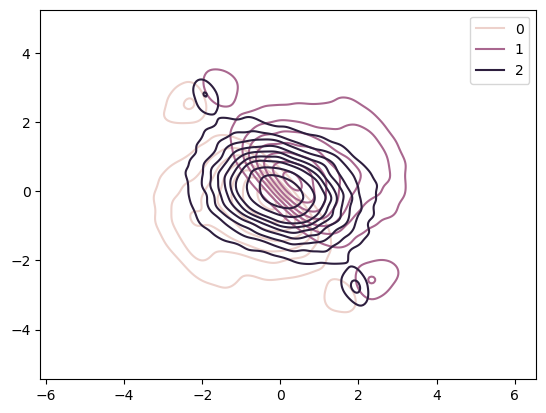

In [34]:
sns.kdeplot(x = data_pca[0::100, 0], y = data_pca[0::100, 1], hue=clusters[0::100])

In [35]:
# centroids = scaler.inverse_transform(kmeans.cluster_centers_)
# print("Cluster centers (original feature space):")
# print(pd.DataFrame(centroids, columns=column_names))

In [36]:
# print("PCA components (feature importance):")
# print(pd.DataFrame(pca.components_, columns=column_names))

In [37]:
# cyan_cluster_label = 1
# cyan_cluster_points = data_combined_df[data_combined_df['Cluster'] == cyan_cluster_label]
# cyan_cluster_points

In [38]:
# cyan_cluster_points[['U_total']]

In [39]:
# plt.figure(figsize=(10, 6))
# plt.plot(cyan_cluster_points.index, cyan_cluster_points['U_total'], linestyle='-', marker='o', color='cyan')
# plt.xlabel('Index')
# plt.ylabel('U_total')
# plt.title('U_total Values for Cyan Cluster')
# plt.grid(True)
# plt.show()

In [40]:
# cyan_cluster_positive = cyan_cluster_points[cyan_cluster_points['U_total'] > 0]
# cyan_cluster_non_positive = cyan_cluster_points[cyan_cluster_points['U_total'] <= 0]


# plt.figure(figsize=(10, 6))
# plt.plot(cyan_cluster_positive.index, cyan_cluster_positive['U_total'], linestyle='-', marker='o', color='blue', label='U_total > 0')
# plt.plot(cyan_cluster_non_positive.index, cyan_cluster_non_positive['U_total'], linestyle='-', marker='o', color='red', label='U_total <= 0')
# plt.xlabel('Index')
# plt.ylabel('U_total')
# plt.title('U_total Values for Cyan Cluster (Sp[[0.0001490152423865438,
#   -0.056342960706027546,
#   4.705459608940639e-06,
#   -0.023997387342599555],
#  [-0.056342960706027546,
#   153.61445123375822,
#   -0.043334023121050586,
#   -12.060326483759946],
#  [4.705459608940639e-06,
#   -0.043334023121050586,
#   4.7701541745783226e-05,
#   -0.01911624053635777],
#  [-0.023997387342599555,
#   -12.060326483759946,
#   -0.01911624053635777,
#   56.7986445738767]]lit by U_total)')
# plt.legend()
# plt.grid(True)
# plt.show()

In [41]:
# cyan_cluster_positive.head()

In [42]:
# cyan_cluster_non_positive.head()

In [43]:
# cyan_cluster_near_zero = cyan_cluster_points[(cyan_cluster_points['U_total'] > -.0001) & (cyan_cluster_points['U_total'] < .0001)]
# cyan_cluster_near_zero.head()

Doing only the key variables

In [44]:
data_combined = np.column_stack((psi_e_total, b_e_total, psi_plus_total, b_plus_total, U_total))
column_names = ['psi_e_total', 'b_e_total', 'psi_plus_total', 'b_plus_total', 'U_total']

data_combined_df_key_var = pd.DataFrame(data_combined, columns=column_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_combined_df_key_var)

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_scaled)
clusters = kmeans.labels_

print("Cluster labels:", clusters)

data_combined_df_key_var['Cluster'] = clusters

data_combined_df_key_var.head()

Cluster labels: [2 2 2 ... 1 1 1]


,psi_e_total,b_e_total,psi_plus_total,b_plus_total,U_total,Cluster
0,-0.011745,-5.517162,-0.001648,10.730766,0.461541,2
1,-0.011215,-3.192071,-0.002356,10.775811,0.468670,2
2,-0.011376,-0.930782,-0.003052,10.540208,0.478139,2
3,-0.006238,1.111849,-0.003719,10.029609,0.487596,2
4,-0.005910,2.717451,-0.004345,9.278920,0.495341,2


In [45]:
# sns.kdeplot(0, 1, data = data_combined.iloc[:, :2])

TypeError: kdeplot() got multiple values for argument 'data'

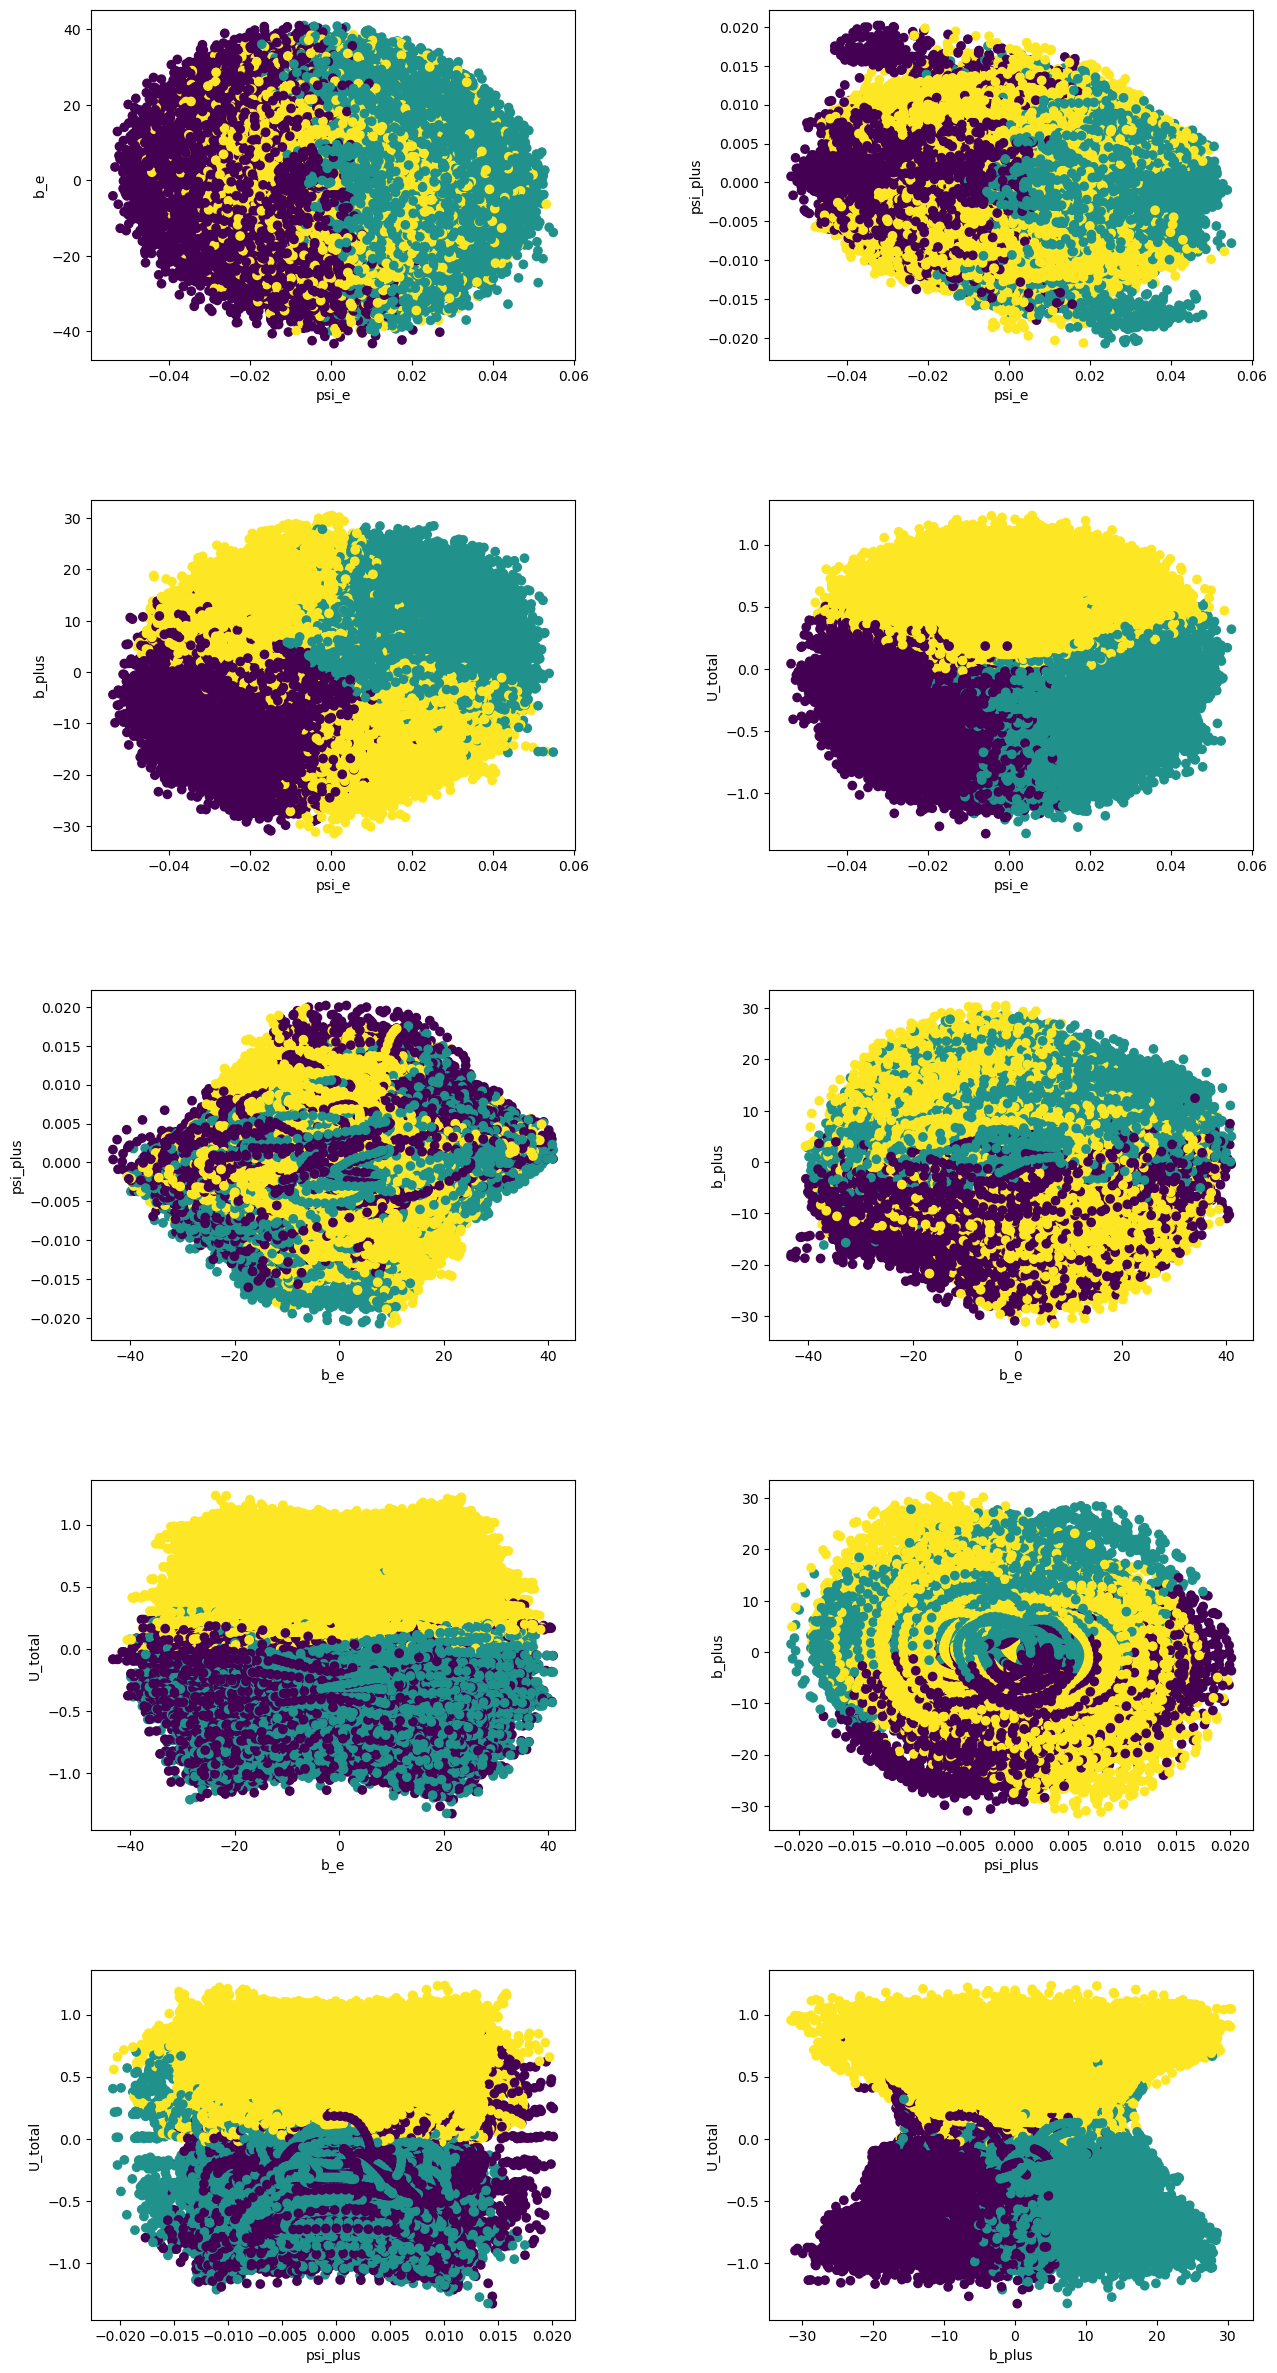

In [ ]:
# data = data_combined_df_key_var
# clusters = data['Cluster']

# fig, axs = plt.subplots(5, 2, figsize=(15, 30))

# axs[0, 0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters)
# axs[0, 0].set_xlabel('psi_e')
# axs[0, 0].set_ylabel('b_e')

# axs[0, 1].scatter(data.iloc[:, 0], data.iloc[:, 2], c=clusters)
# axs[0, 1].set_xlabel('psi_e')
# axs[0, 1].set_ylabel('psi_plus')

# axs[1, 0].scatter(data.iloc[:, 0], data.iloc[:, 3], c=clusters)
# axs[1, 0].set_xlabel('psi_e')
# axs[1, 0].set_ylabel('b_plus')

# axs[1, 1].scatter(data.iloc[:, 0], data.iloc[:, 4], c=clusters)
# axs[1, 1].set_xlabel('psi_e')
# axs[1, 1].set_ylabel('U_total')

# axs[2, 0].scatter(data.iloc[:, 1], data.iloc[:, 2], c=clusters)
# axs[2, 0].set_xlabel('b_e')
# axs[2, 0].set_ylabel('psi_plus')

# axs[2, 1].scatter(data.iloc[:, 1], data.iloc[:, 3], c=clusters)
# axs[2, 1].set_xlabel('b_e')
# axs[2, 1].set_ylabel('b_plus')

# axs[3, 0].scatter(data.iloc[:, 1], data.iloc[:, 4], c=clusters)
# axs[3, 0].set_xlabel('b_e')
# axs[3, 0].set_ylabel('U_total')

# axs[3, 1].scatter(data.iloc[:, 2], data.iloc[:, 3], c=clusters)
# axs[3, 1].set_xlabel('psi_plus')
# axs[3, 1].set_ylabel('b_plus')

# axs[4, 0].scatter(data.iloc[:, 2], data.iloc[:, 4], c=clusters)cyan_cluster_near_zero = cyan_cluster_points[(cyan_cluster_points['U_total'] > -.0001) & (cyan_cluster_points['U_total'] < .0001)]
# cyan_cluster_near_zero.head()
# plt.show()

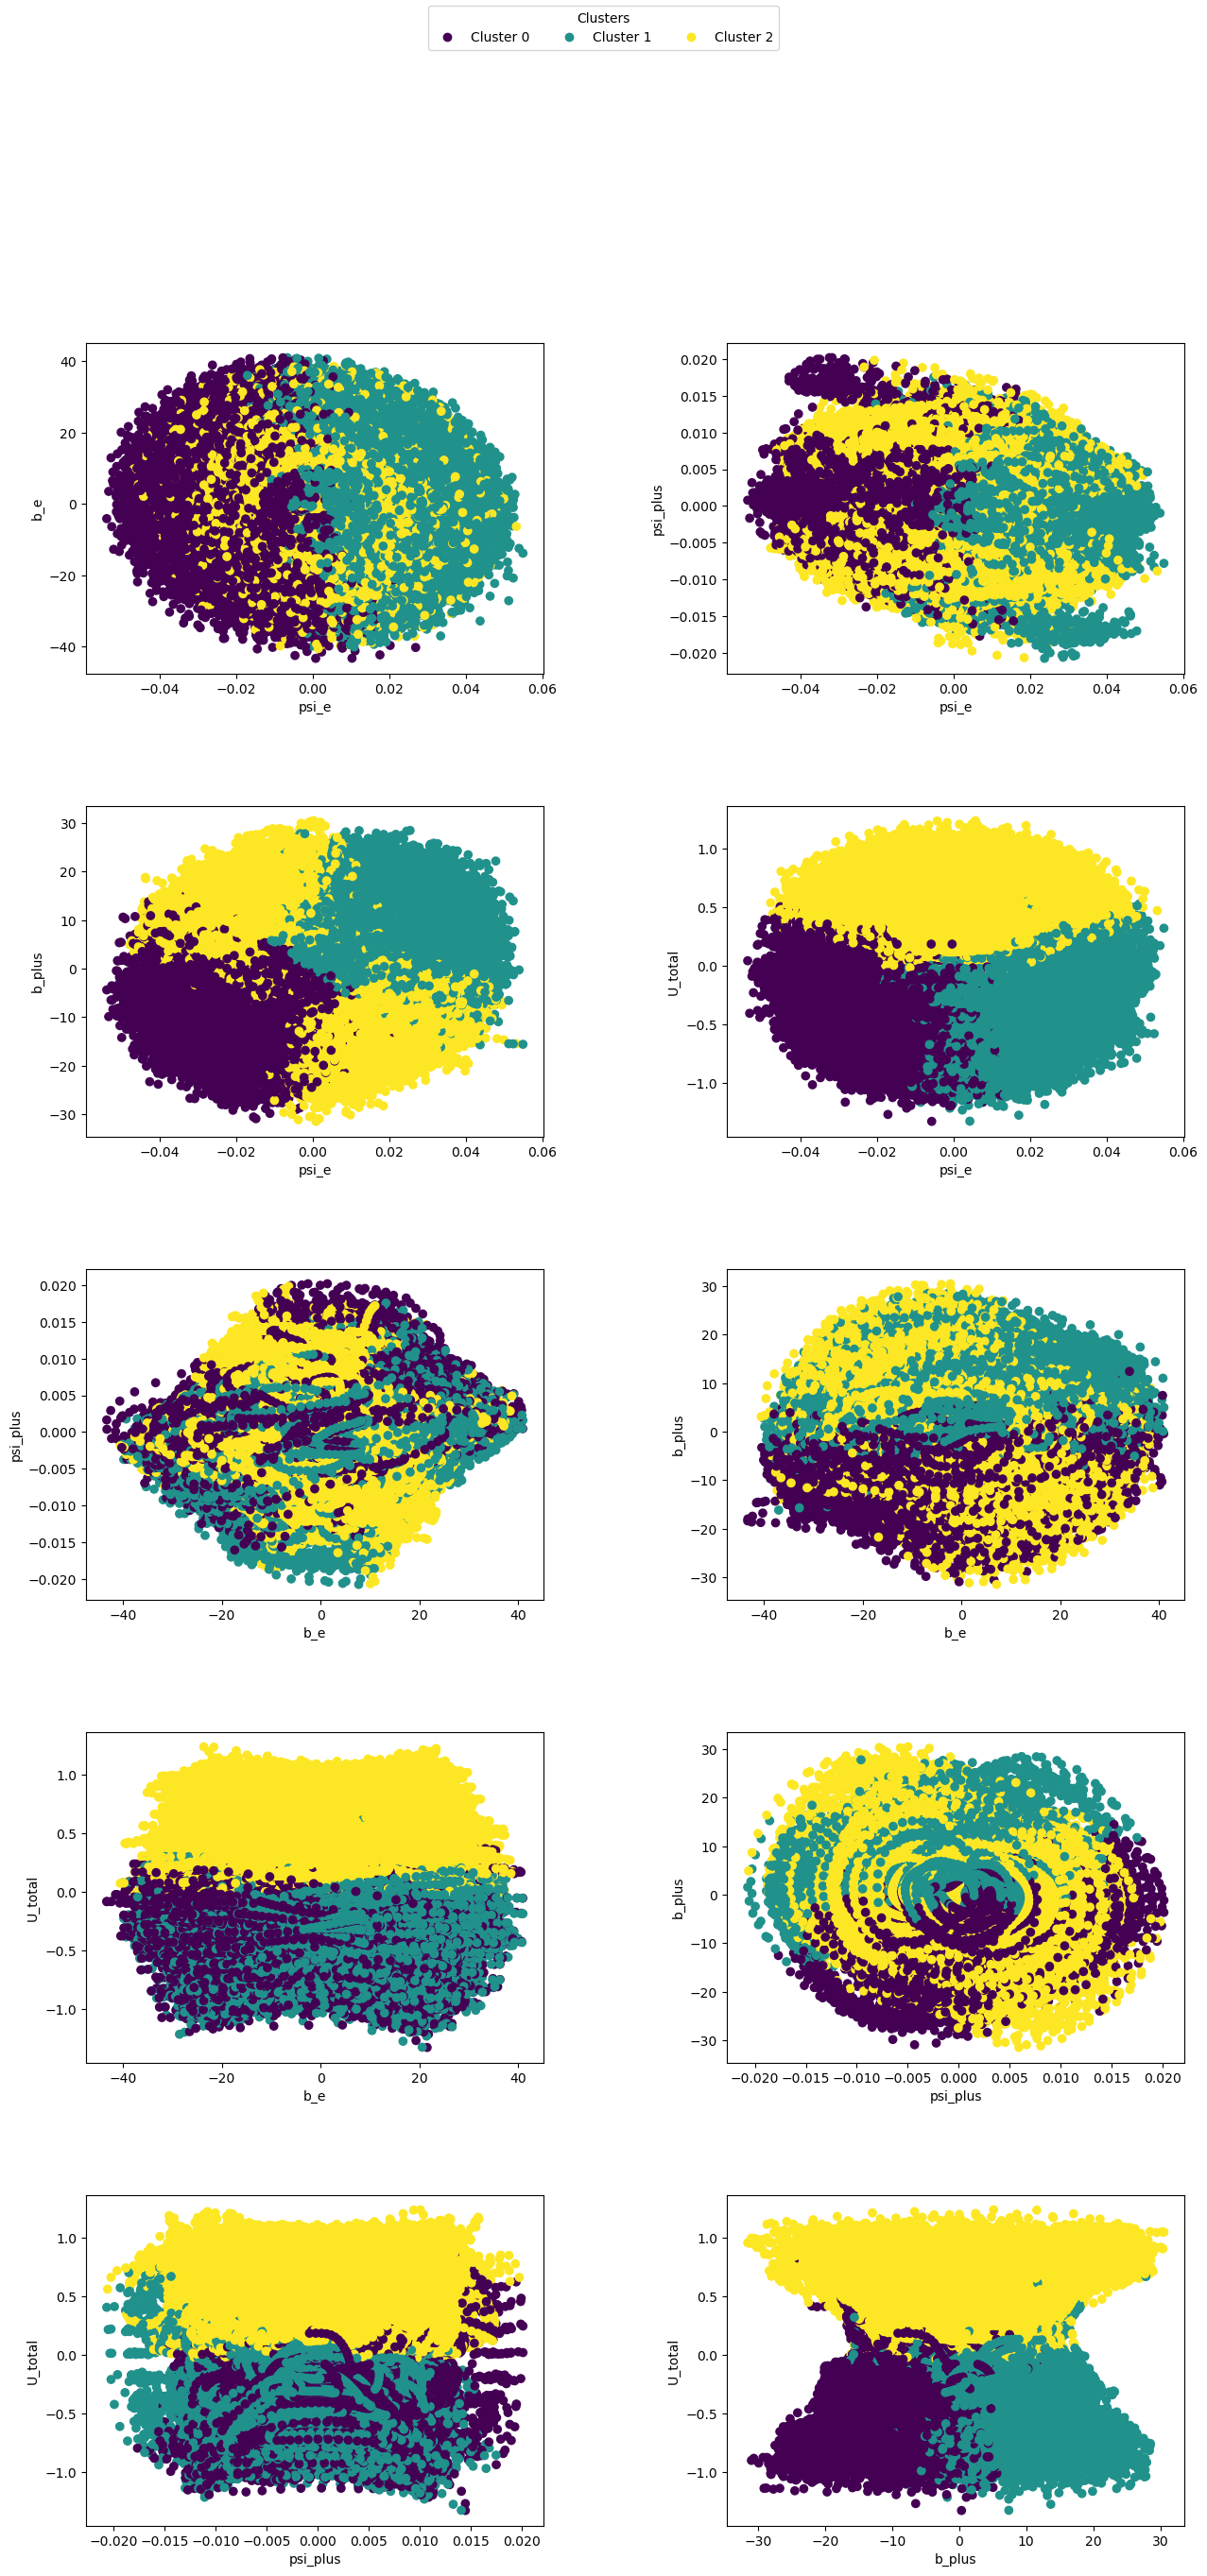

In [ ]:
# import matplotlib.pyplot as plt

# data = data_combined_df_key_var
# clusters = data['Cluster']

# fig, axs = plt.subplots(5, 2, figsize=(15, 30))
# cmap = 'viridis'  


# scatter0 = axs[0, 0].scatter(data.iloc[:, 0], data.iloc[:, 1], c=clusters, cmap=cmap)
# axs[0, 0].set_xlabel('psi_e')
# axs[0, 0].set_ylabel('b_e')

# scatter1 = axs[0, 1].scatter(data.iloc[:, 0], data.iloc[:, 2], c=clusters, cmap=cmap)
# axs[0, 1].set_xlabel('psi_e')
# axs[0, 1].set_ylabel('psi_plus')

# scatter2 = axs[1, 0].scatter(data.iloc[:, 0], data.iloc[:, 3], c=clusters, cmap=cmap)
# axs[1, 0].set_xlabel('psi_e')
# axs[1, 0].set_ylabel('b_plus')

# scatter3 = axs[1, 1].scatter(data.iloc[:, 0], data.iloc[:, 4], c=clusters, cmap=cmap)
# axs[1, 1].set_xlabel('psi_e')
# axs[1, 1].set_ylabel('U_total')

# scatter4 = axs[2, 0].scatter(data.iloc[:, 1], data.iloc[:, 2], c=clusters, cmap=cmap)
# axs[2, 0].set_xlabel('b_e')
# axs[2, 0].set_ylabel('psi_plus')

# scatter5 = axs[2, 1].scatter(data.iloc[:, 1], data.iloc[:, 3], c=clusters, cmap=cmap)
# axs[2, 1].set_xlabel('b_e')
# axs[2, 1].set_ylabel('b_plus')

# scatter6 = axs[3, 0].scatter(data.iloc[:, 1], data.iloc[:, 4], c=clusters, cmap=cmap)
# axs[3, 0].set_xlabel('b_e')
# axs[3, 0].set_ylabel('U_total')

# scatter7 = axs[3, 1].scatter(data.iloc[:, 2], data.iloc[:, 3], c=clusters, cmap=cmap)
# axs[3, 1].set_xlabel('psi_plus')
# axs[3, 1].set_ylabel('b_plus')

# scatter8 = axs[4, 0].scatter(data.iloc[:, 2], data.iloc[:, 4], c=clusters, cmap=cmap)
# axs[4, 0].set_xlabel('psi_plus')
# axs[4, 0].set_ylabel('U_total')

# scatter9 = axs[4, 1].scatter(data.iloc[:, 3], data.iloc[:, 4], c=clusters, cmap=cmap)
# axs[4, 1].set_xlabel('b_plus')
# axs[4, 1].set_ylabel('U_total')


# legend_elements = scatter0.legend_elements()[0]
# labels = [f'Cluster {i}' for i in range(len(legend_elements))]

# fig.legend(legend_elements, labels, title="Clusters", loc='upper center', ncol=5)

# plt.subplots_adjust(wspace=.4)
# plt.subplots_adjust(hspace=.4)

# plt.show()


Exploring the Clusters

In [ ]:
cluster_data = data.groupby("Cluster").describe()
cluster_data

psi_e_total                                                    \
              count      mean       std       min       25%       50%   
Cluster                                                                 
0         2823065.0  0.008791  0.008577 -0.027561  0.002803  0.007956   
1         5065223.0 -0.000012  0.010435 -0.048904 -0.007021 -0.000010   
2         2825712.0 -0.008764  0.008570 -0.053721 -0.013942 -0.007928   

                             b_e_total            ... b_plus_total             \
              75%       max      count      mean  ...          75%        max   
Cluster                                           ...                           
0        0.013994  0.053879  2823065.0  1.117287  ...     5.440699  28.511020   
1        0.006996  0.054890  5065223.0  0.013843  ...     3.097680  30.521040   
2       -0.002788  0.033412  2825712.0 -1.119866  ...    -0.591167  14.471225   

           U_total                                                    \
             count      mean       std       min       25%       50%   
Cluster                                                                
0        2823065.0 -0.280559  0.170610 -1.328400 -0.385186 -0.286614   
1        5065223.0  0.358957  0.136139 -0.062208  0.275295  0.350065   
2        2825712.0 -0.281008  0.169864 -1.330089 -0.385084 -0.286771   

                             
              75%       max  
Cluster                      
0       -0.184162  0.816355  
1        0.435843  1.234048  
2       -0.185007  0.840238  

[3 rows x 40 columns]

In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.67247166e-01  1.29575133e-01 -8.91139742e-02  6.47019547e-01
  -8.51346614e-01]
 [-9.67873218e-04  8.71610803e-04  1.38787712e-03  6.33144176e-05
   9.50022449e-01]
 [-7.64899600e-01 -1.31034353e-01  8.65546472e-02 -6.46616662e-01
  -8.52545263e-01]]


In [ ]:
cluster_variances = data.groupby("Cluster").var()

overall_variance = data.var()

variance_ratio = cluster_variances.mean() / overall_variance
important_features_variance = variance_ratio.sort_values(ascending=False)
print(important_features_variance)

b_e_total         1.033095
psi_plus_total    0.942733
b_plus_total      0.733509
psi_e_total       0.637404
U_total           0.205191
Cluster                NaN
dtype: float64
